Nishant Andoriya

201951105

Assigment 11

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
data = pd.read_csv("cookie_cats.csv")
data

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


Check which version of the game is better by computing average ”sum gamerounds”.

In [5]:
# Difference
mean_a = data[data['version'] == 'gate_30'].sum_gamerounds.mean()
mean_b = data[data['version'] == 'gate_40'].sum_gamerounds.mean()
print("Mean sum of gamerounds for gate_30 : ", mean_a)
print("Mean sum of gamerounds for gate_40 : ", mean_b)
print("Difference Between average of sum gamerounds : ", mean_a - mean_b  )

Mean sum of gamerounds for gate_30 :  52.45626398210291
Mean sum of gamerounds for gate_40 :  51.29877552814966
Difference Between average of sum gamerounds :  1.157488453953249


Text(0.5, 0.98, '')

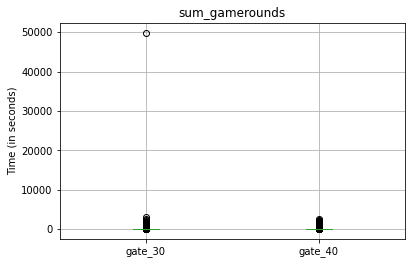

In [7]:
ax = data.boxplot(by='version', column='sum_gamerounds')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

Perform the permutation Resampling on the data and derive the probability. Make the decision based on derived probability.

Permutation Test

Steps to perform permutation test,

Combine the results from the different groups into a single data set.

Shuffle the combined data and then randomly draw (without replacement) a resample of the same size as group A (clearly it will contain some data from the other groups).

From the remaining data, randomly draw (without replacement) a resample of the same size as group B.

Do the same for groups C, D, and so on. You have now collected one set of resamples that mirror the sizes of the original samples.

Whatever statistic or estimate was calculated for the original samples (e.g., difference in group proportions), calculate it now for the resamples, and record; this constitutes one permutation iteration.

In [6]:
# Resampling
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_A].mean() - x.loc[idx_B].mean()

nA= len(data[data['version'] == 'gate_30'])
print(nA)
nB=len(data[data['version'] == 'gate_40'])
print(nB)
perm_diffs = [perm_fun(data.sum_gamerounds, nA, nB) for _ in range(1000)]

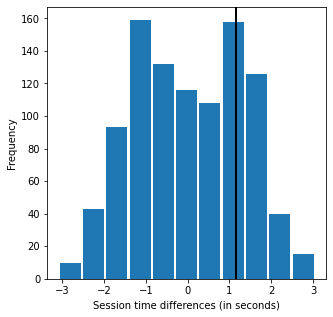

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)

# original mean difference
ax.axvline(x= mean_a -mean_b, color='black', lw=2)

ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')
plt.show()


In [11]:
np.mean(perm_diffs > mean_a - mean_b)

0.24

Yes. Since above percentage of total permutation is small, the difference between mean time spent on gate_30 and gate_34 is by chance.